In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
import category_encoders as ce 
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv(r'D:\Data Science\Files\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Data Cleaning

## Price 

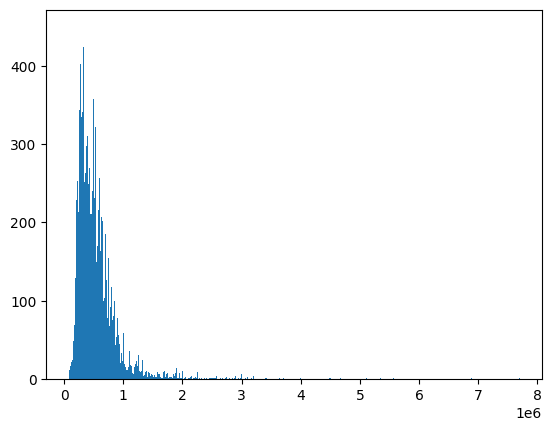

In [15]:
plt.hist(df['price'], bins=1000);

In [16]:
df['price'] = np.log1p(df['price'])
df['price'].value_counts()

price
12.765691    172
13.017005    172
13.217675    159
13.122365    152
12.959847    150
            ... 
13.316302      1
14.124833      1
12.607533      1
13.772082      1
12.904461      1
Name: count, Length: 4028, dtype: int64

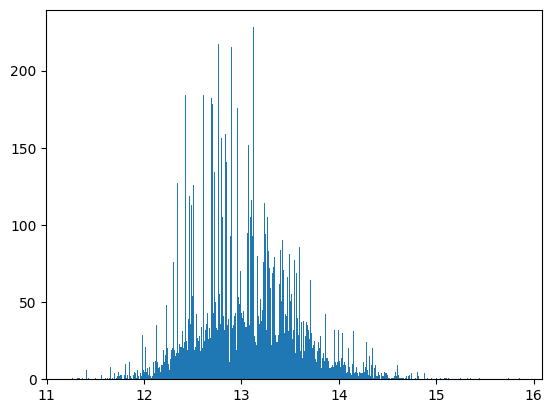

In [17]:
plt.hist(df['price'], bins=1000);

## Price

In [4]:
df['price'] = df['price'].astype(int)

## Floors

In [5]:
df['floors'] = df['floors'].astype(int)

# Feature Engineering

# Age Built

In [6]:
df['age'] = datetime.datetime.now().year - df['yr_built']
df['age']

0        69
1        73
2        91
3        59
4        37
         ..
21608    15
21609    10
21610    15
21611    20
21612    16
Name: age, Length: 21613, dtype: int64

## Age renovated

In [7]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [12]:
df['renovated_age'] = datetime.datetime.now().year - df['yr_renovated']
df['renovated_age'] = np.where((df['yr_renovated']==0), df['age'], df['renovated_age'])
df['renovated_age'].value_counts()

renovated_age
10     650
19     485
18     478
20     459
21     457
      ... 
123     28
122     25
91      23
89      19
90      14
Name: count, Length: 116, dtype: int64

(;*x +1 )**(1/l)-1

# Encoding / Scaling

## Types of features

Ordinal
-------------
view
condition
grade


Nominal 
-------------
waterfront




Continuous
-------------
bedrooms
bathrooms
sqft_living
sqft_lot
floors
sqft_above
sqft_basement
zipcode
lat
long
sqft_living15
sqft_lot15
yr_built
yr_renovated
age
renovated_age


## Encoding

In [20]:
ord_feats = df[['view', 'condition', 'grade']]
ord = OrdinalEncoder()
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats


,view,condition,grade
0,0.0,2.0,5.0
1,0.0,2.0,5.0
2,0.0,2.0,4.0
3,0.0,4.0,5.0
4,0.0,2.0,6.0
...,...,...,...
21608,0.0,2.0,6.0
21609,0.0,2.0,6.0
21610,0.0,2.0,5.0
21611,0.0,2.0,6.0


In [23]:
# nom_feats = df[['waterfront']]
# oe = OneHotEncoder()
# oe.fit(nom_feats)
# nom_feats_encoded = oe.transform(nom_feats)
# new_nom_feats = pd.DataFrame(nom_feats_encoded, columns=nom_feats.columns)
# new_nom_feats

,waterfront
0,"(0, 0)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 0)\t1.0"
...,...
21608,"(0, 0)\t1.0"
21609,"(0, 0)\t1.0"
21610,"(0, 0)\t1.0"
21611,"(0, 0)\t1.0"


## Scaling

In [ ]:
cont_feats = df[['']]
min = MinMaxScaler()


In [4]:
df1 = df.drop(columns=['id', 'date'])

In [5]:
df1.corrwith(df1['price']).abs().sort_values()

long             0.021626
condition        0.036362
zipcode          0.053203
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
dtype: float64

In [6]:
y = df[['price']]
x = df[['sqft_living']]

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.2, random_state=0)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((17290, 1), (17290, 1), (4323, 1), (4323, 1))